In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
img_path = r'C:\Users\SHREYASRI ROY\OneDrive\Desktop\New folder (2)\colorpic.jpg'

In [5]:
img = cv2.imread(img_path)

In [6]:
# declaring global variables (are used later on)
clicked = False

In [7]:
r = g = b = x_pos = y_pos = 0

In [8]:
# Reading csv file with pandas and giving names to each column
index = ["color", "color_name", "hex", "R", "G", "B"]

In [9]:
csv = pd.read_csv('colors.csv', names=index, header=None)

In [10]:
# function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

In [11]:
# function to get x,y coordinates of mouse double click
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [12]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

In [ ]:
plt.imshow(img)

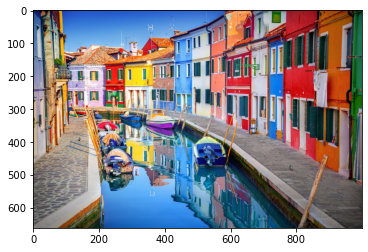

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
while True:

    cv2.imshow("image", img)
    if clicked:

        # cv2.rectangle(image, start point, endpoint, color, thickness)-1 fills entire rectangle
        cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)

        # Creating text string to display( Color name and RGB values )
        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # For very light colours we will display text in black colour
        if r + g + b >= 600:
            cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        clicked = False

    # Break the loop when user hits 'esc' key
    if cv2.waitKey(20) & 0xFF == 27:
        break